In [1]:
# فراخوانی کتاب خانه های مورد نیاز
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [ ]:
# فراخوانی داده ها
df=pd.read_csv("dataset_part_2.csv")
#df.sample(10)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


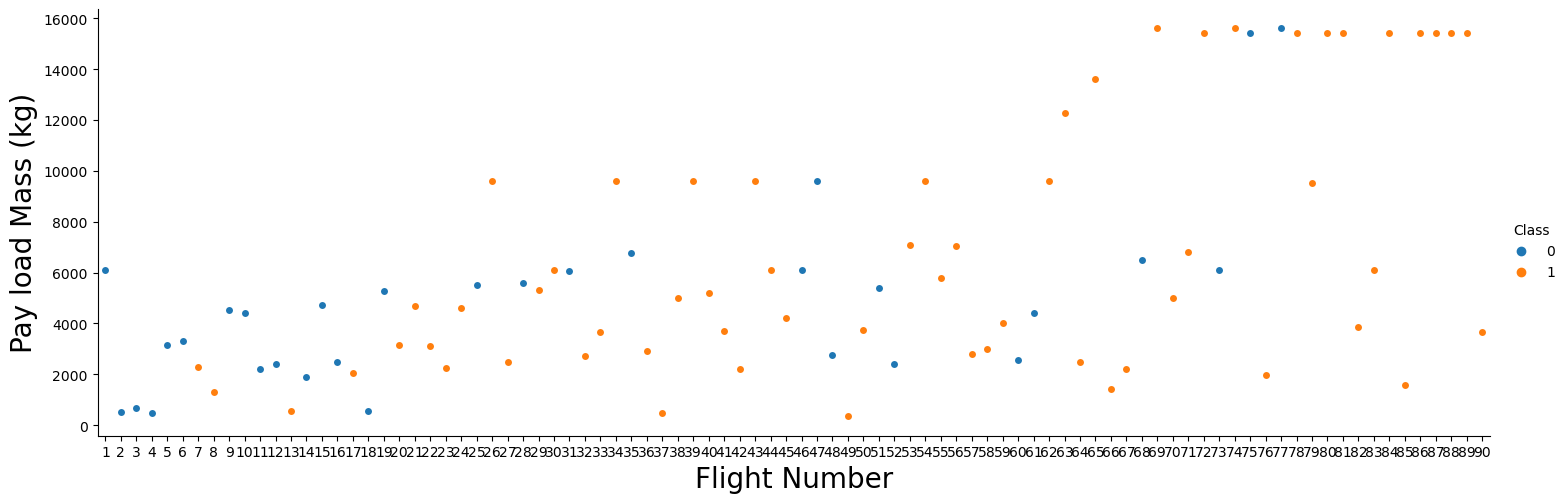

In [29]:
# بررسی ارتباط بین وزن پرتابه ها و تعداد دفعات پرتاب آنها بر اساس موفقیت یا شکست پرتاب
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


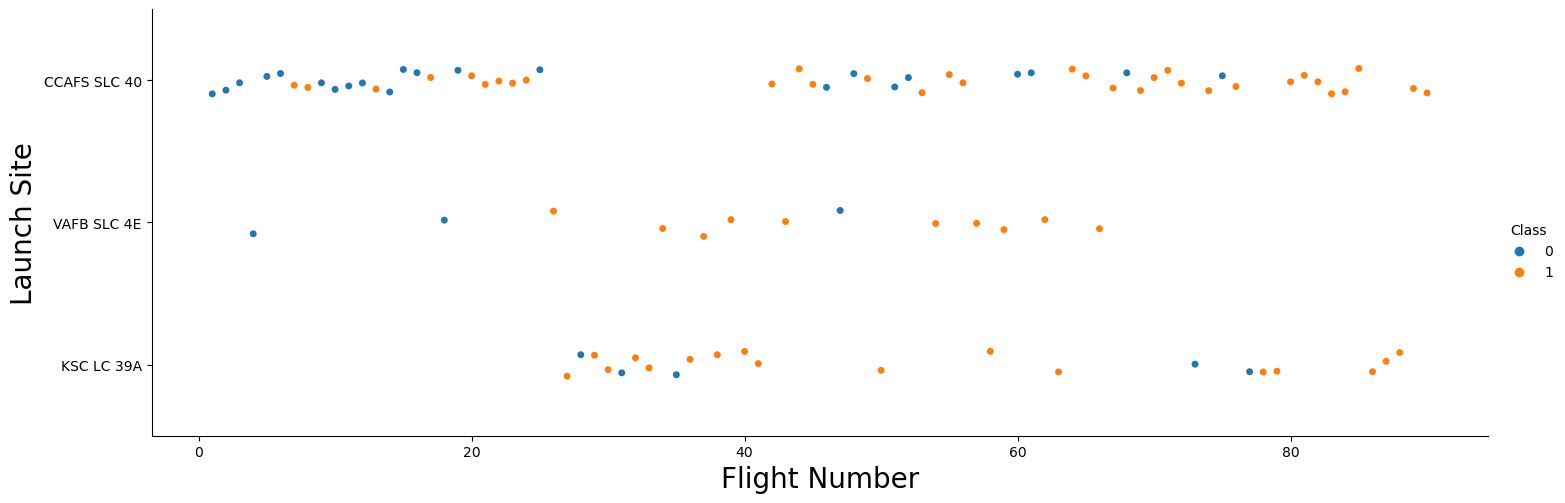

In [19]:
# بررسی ارتباط بین سکو پرتاب و تعداد دفعات پرتاب آنها بر اساس موفقیت یا شکست پرتاب
sns.catplot(x="FlightNumber",y="LaunchSite",hue="Class",data=df,aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


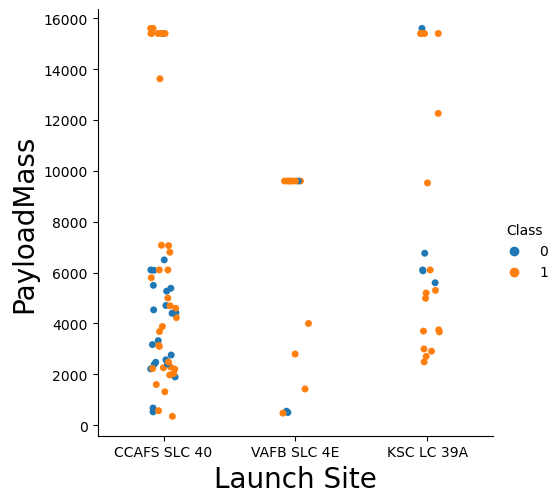

In [33]:
# بررسی ارتباط بین وزن پرتابه ها و سکو پرتاب آنها بر اساس موفقیت یا شکست پرتاب
sns.catplot(y="PayloadMass",x="LaunchSite",hue="Class",data=df)
plt.ylabel("PayloadMass",fontsize=20)
plt.xlabel("Launch Site",fontsize=20)
plt.show()

<Axes: xlabel='Orbit', ylabel='Class'>

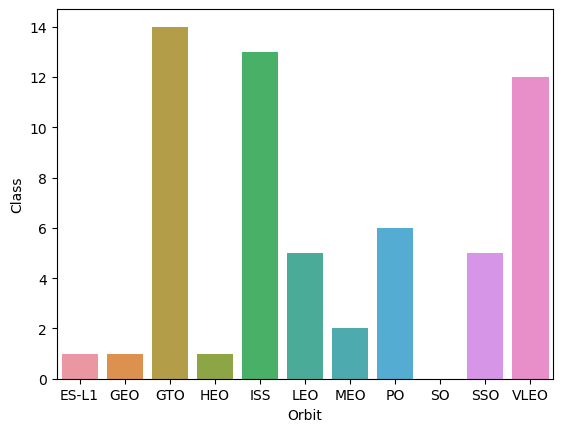

In [60]:
# بررسی تعداد پرتاب های موفق به هر کدام از مدار های کره زمین
df_new = df.groupby("Orbit")["Class"].sum().reset_index()
sns.barplot(x="Orbit",y="Class",data=df_new)

<Axes: xlabel='FlightNumber', ylabel='Orbit'>

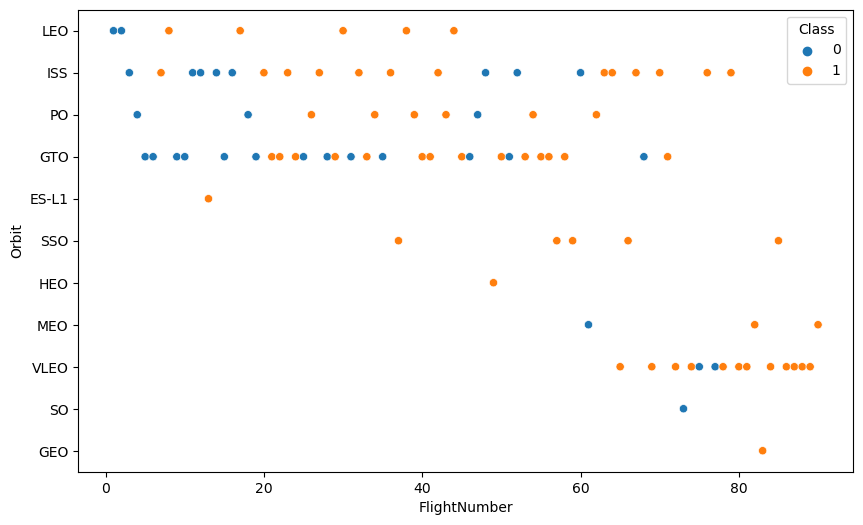

In [58]:
# بررسی ارتباط بین مدار پرتاب و تعداد دفعات پرتاب بر اساس موفقیت یا شکست پرتاب
plt.figure(figsize=(10,6))
sns.scatterplot(x="FlightNumber",y="Orbit",hue="Class",data=df)

<Axes: xlabel='PayloadMass', ylabel='Orbit'>

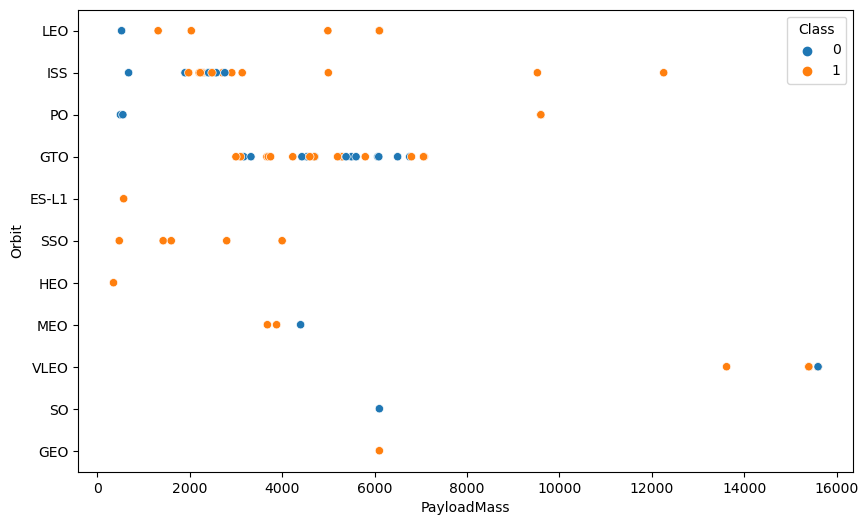

In [64]:
# بررسی ارتباط بین وزن پرتابه ها و مدار پرتاب آنها بر اساس موفقیت یا شکست پرتاب
plt.figure(figsize=(10,6))
sns.scatterplot(x="PayloadMass",y="Orbit",hue="Class",data=df)

In [97]:

# تابع استخراج سال از تاریخ پرتاب ها 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

# اضافه کردن سال به دیتافریم 
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

([<matplotlib.axis.XTick at 0x1db4f79ecd0>,
 [Text(2010, 0, '2010'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020')])

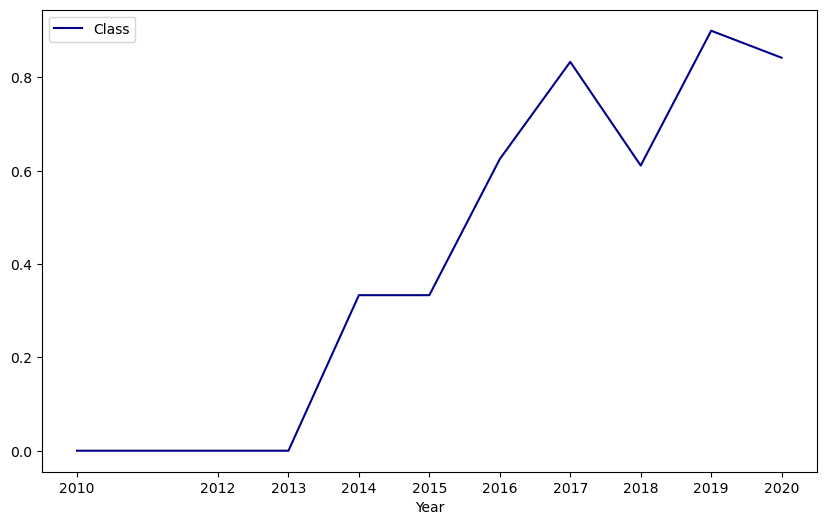

In [101]:
# بررسی نرخ موفقیت در سال های مختلف
df_new=df.groupby("Year")["Class"].mean().reset_index()
df_new.plot(kind="line",x="Year",y="Class",
           figsize=(10,6),
           color="darkblue")
plt.xticks(df_new["Year"])

In [102]:
# انتخاب ویژگی های مهم
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [112]:
# ایجاد دامی برای متغییر های اسمی چندحالته
one_hot = pd.get_dummies(features[["Orbit","LaunchSite","LandingPad","Serial"]])
features_one_hot= pd.concat([features,one_hot])
features_one_hot.drop(["Orbit","LaunchSite","LandingPad","Serial"],axis=1,inplace=True)
features_one_hot.sample(5)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
65,66.0,1425.0,2.0,True,True,True,5.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,...,False,False,False,False,False,False,False,False,False,False
43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,...,False,False,False,False,False,False,False,False,False,False
85,86.0,15400.0,2.0,True,True,True,5.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,...,False,False,False,False,False,False,False,False,False,False


In [114]:
# یکسان سازی نوع داده های عددی
features_one_hot.astype(float)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# دریافت خروجی از داده ها
features_one_hot.to_csv('dataset_part_3.csv', index=False)